# Basic Statistics

In [1]:
#Incercati experimentul aruncarii unei monede.
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import math as m
import scipy.stats as stats

In [2]:
from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as spst

import seaborn as sns

In [3]:
#%pylab inline
#pylab.rcParams['figure.figsize'] = (14, 6)

np.random.seed(123)
#5 aruncari
draws = 5 
coin_sample = np.random.binomial(1, 0.5, draws) 
coin_average = [coin_sample[:jj].mean() for jj in range(1, draws)]

heads = np.sum(coin_sample[coin_sample==1])
tails = draws-heads
print('Heads: ', heads, heads/draws)
print('Tails: ', tails, tails/draws)
print(stats.binom_test(x=[heads, tails], p=0.5, alternative='two-sided'))

Heads:  3 0.6
Tails:  2 0.4
1.0


In [4]:
#10 aruncari
draws = 10
coin_sample = np.random.binomial(1, 0.5, draws)
coin_average = [coin_sample[:jj].mean() for jj in range(1, draws)]
heads = np.sum(coin_sample[coin_sample==1])
tails = draws-heads
print('Heads: ', heads, heads/draws)
print('Tails: ', tails, tails/draws)
print(stats.binom_test(x=[heads, tails], p=0.5, alternative='two-sided'))

Heads:  3 0.3
Tails:  7 0.7
0.3437499999999999


In [5]:
#30 aruncari
draws = 30
coin_sample = np.random.binomial(1, 0.5, draws)
coin_average = [coin_sample[:jj].mean() for jj in range(1, draws)]
heads = np.sum(coin_sample[coin_sample==1])
tails = draws-heads
print('Heads: ', heads, heads/draws)
print('Tails: ', tails, tails/draws)
print(stats.binom_test(x=[heads, tails], p=0.5, alternative='two-sided'))

Heads:  14 0.4666666666666667
Tails:  16 0.5333333333333333
0.8555355519056318


In [6]:
#60 aruncari
draws = 60
coin_sample = np.random.binomial(1, 0.5, draws)
coin_average = [coin_sample[:jj].mean() for jj in range(1, draws)]
heads = np.sum(coin_sample[coin_sample==1])
tails = draws-heads
print('Heads: ', heads, heads/draws)
print('Tails: ', tails, tails/draws)
print(stats.binom_test(x=[heads, tails], p=0.5, alternative='two-sided'))

Heads:  33 0.55
Tails:  27 0.45
0.5189580031896516


In [7]:
#120 aruncari
draws = 120
coin_sample = np.random.binomial(1, 0.5, draws)
coin_average = [coin_sample[:jj].mean() for jj in range(1, draws)]
heads = np.sum(coin_sample[coin_sample==1])
tails = draws-heads
print('Heads: ', heads, heads/draws)
print('Tails: ', tails, tails/draws)
print(stats.binom_test(x=[heads, tails], p=0.5, alternative='two-sided'))

Heads:  66 0.55
Tails:  54 0.45
0.31530330083225827


# Linear Regression

In [8]:
#verificati daca exista vre-o corelatie intre inaltimea fetelor sau baietilor in raport cu mamele lor.
#1. Masurati coeficientul de corelatie dintre aceste variabile
#2. Comentati aceste rezultate in comparatie cu cele obtinute pentru parintii de sex masculin si copii lor



   child  parent  frequency  gp     par  chl
0   59.5    62.5       0.50  fs  Father  Son
1   59.5    63.5       0.50  fs  Father  Son
2   59.5    64.5       1.00  fs  Father  Son
3   60.5    62.5       0.50  fs  Father  Son
4   60.5    66.5       1.00  fs  Father  Son
5   61.5    59.5       0.25  fs  Father  Son
6   61.5    60.5       0.25  fs  Father  Son
7   61.5    62.5       0.50  fs  Father  Son
8   61.5    63.5       1.00  fs  Father  Son
9   61.5    64.5       0.25  fs  Father  Son


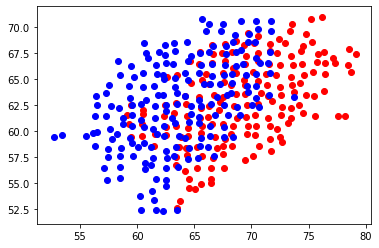

(0.484917684251786, 9.100362271637111e-12)
(0.4674367713012403, 1.9747722235598635e-11)


In [9]:
pearson = pd.read_csv('pearson.csv')
print(pearson.head(10))
#salvam din pearson doar datele care au pe coloana GP, numai ms( Mother-son)
fs = pearson[pearson['gp']=='ms']
#salvam din pearson doar datele care au pe coloana GP, numai md( Mother-doughter)
fd = pearson[pearson['gp']=='md']
#facem un plot, pe x punem fs coloana child(inaltimea copilului), pe y punem coloana parent
plt.scatter(
    fs['child'] + np.random.normal(scale=0.2, size=fs.shape[0]),
    fs['parent'] + np.random.normal(scale=0.2, size=fs.shape[0]), c='r')
plt.scatter(
    fd['child'] + np.random.normal(scale=0.2, size=fd.shape[0]),
    fd['parent'] + np.random.normal(scale=0.2, size=fd.shape[0]), c='b')
plt.show()
#corelatie dintre fs parent-child
print(stats.pearsonr(fs['parent'], fs['child']))
#corelatie dintre fd parent-child
print(stats.pearsonr(fd['parent'], fd['child']))

   child  parent  frequency  gp     par  chl
0   59.5    62.5       0.50  fs  Father  Son
1   59.5    63.5       0.50  fs  Father  Son
2   59.5    64.5       1.00  fs  Father  Son
3   60.5    62.5       0.50  fs  Father  Son
4   60.5    66.5       1.00  fs  Father  Son
5   61.5    59.5       0.25  fs  Father  Son
6   61.5    60.5       0.25  fs  Father  Son
7   61.5    62.5       0.50  fs  Father  Son
8   61.5    63.5       1.00  fs  Father  Son
9   61.5    64.5       0.25  fs  Father  Son


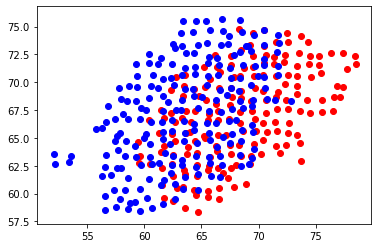

(0.5206723830914775, 7.954369816601039e-14)
(0.4720530065221036, 7.905672025207683e-13)


In [10]:
pearson = pd.read_csv('pearson.csv')
print(pearson.head(10))
#salvam din pearson doar datele care au pe coloana GP, numai ms( father-son)
fs = pearson[pearson['gp']=='fs']
#salvam din pearson doar datele care au pe coloana GP, numai md( father-daughter)
fd = pearson[pearson['gp']=='fd']
plt.scatter(
    fs['child'] + np.random.normal(scale=0.2, size=fs.shape[0]),
    fs['parent'] + np.random.normal(scale=0.2, size=fs.shape[0]), c='r')
plt.scatter(
    fd['child'] + np.random.normal(scale=0.2, size=fd.shape[0]),
    fd['parent'] + np.random.normal(scale=0.2, size=fd.shape[0]), c='b')
plt.show()
print(stats.pearsonr(fs['parent'], fs['child']))
print(stats.pearsonr(fd['parent'], fd['child']))


In [12]:
###Lecture-LinearRegression
print("Lecture-LinearRegression")
credit = pd.read_csv('credit.csv')
print(credit.head(10))
#1
print(smf.ols('Balance~Ethnicity', data=credit).fit().summary())
print(smf.ols('Balance~Married', data=credit).fit().summary())
print(smf.ols('Balance~Student', data=credit).fit().summary())
print(smf.ols('Balance~Rating', data=credit).fit().summary())
print(smf.ols('Balance~Limit', data=credit).fit().summary())
print(smf.ols('Balance~Income', data=credit).fit().summary())




Lecture-LinearRegression
    Income  Limit  Rating  Cards  Age  Education  Gender Student Married  \
0   14.891   3606     283      2   34         11    Male      No     Yes   
1  106.025   6645     483      3   82         15  Female     Yes     Yes   
2  104.593   7075     514      4   71         11    Male      No      No   
3  148.924   9504     681      3   36         11  Female      No      No   
4   55.882   4897     357      2   68         16    Male      No     Yes   
5   80.180   8047     569      4   77         10    Male      No      No   
6   20.996   3388     259      2   37         12  Female      No      No   
7   71.408   7114     512      2   87          9    Male      No      No   
8   15.125   3300     266      5   66         13  Female      No      No   
9   71.061   6819     491      3   41         19  Female     Yes     Yes   

          Ethnicity  Balance  
0         Caucasian      333  
1             Asian      903  
2             Asian      580  
3             

strong multicollinearity or other numerical problems.


In [13]:
#2
print(smf.ols('Balance~Income+Limit+Rating+Student+Married+Ethnicity', data=credit).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     1123.
Date:                Thu, 14 Nov 2019   Prob (F-statistic):          5.94e-255
Time:                        10:07:39   Log-Likelihood:                -2409.9
No. Observations:                 400   AIC:                             4836.
Df Residuals:                     392   BIC:                             4868.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               -523

In [14]:
#3
print(smf.ols('Balance~Income+Limit+Rating', data=credit).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     934.6
Date:                Thu, 14 Nov 2019   Prob (F-statistic):          3.20e-179
Time:                        10:08:08   Log-Likelihood:                -2601.5
No. Observations:                 400   AIC:                             5211.
Df Residuals:                     396   BIC:                             5227.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -489.7275     32.099    -15.257      0.0